In [1]:
import tensorflow as tf

# Ініціалізація двох констант
x1 = tf.constant([1,2,3,4])

x2 = tf.constant([5,6,7,8])

result = tf.multiply(x1, x2)
print(result)

2024-10-13 14:39:47.060651: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-13 14:39:47.203845: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-13 14:39:47.379213: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-13 14:39:47.511404: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-13 14:39:47.549782: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-13 14:39:47.818062: I tensorflow/core/platform/cpu_feature_gu

tf.Tensor([ 5 12 21 32], shape=(4,), dtype=int32)


In [2]:
import os
from pathlib import Path
from skimage import io
from typing import List, Tuple

def load_data(data_directory: str) -> Tuple[List, List]:
    images = []
    labels = []
    
    data_path = Path(data_directory)
    
    for label_dir in data_path.iterdir():
        if label_dir.is_dir():
            # Iterate over files in the directory with .ppm extension
            for file in label_dir.glob("*.ppm"):
                try:
                    images.append(io.imread(file))  # Load the image
                    labels.append(int(label_dir.name))  # Use directory name as label
                except Exception as e:
                    print(f"Error loading file {file}: {e}")
    
    return images, labels



In [3]:
import os

ROOT_PATH ="."
train_data_directory = os.path.join(ROOT_PATH, "Training")
test_data_directory = os.path.join(ROOT_PATH, "Testing")
images, labels = load_data(train_data_directory)

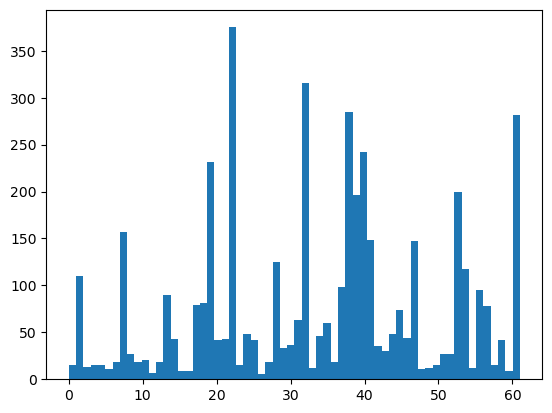

In [4]:
import matplotlib.pyplot as plt
plt.hist(labels, 62)
plt.show()

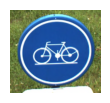

shape: (236, 256, 3), min: 0, max: 255


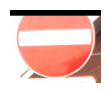

shape: (133, 164, 3), min: 0, max: 255


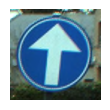

shape: (122, 121, 3), min: 0, max: 255


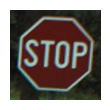

shape: (123, 123, 3), min: 0, max: 215


In [5]:
import matplotlib.pyplot as plt

traffic_signs = [300, 2250, 3650, 4000]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis("off")
    plt.imshow(images[traffic_signs[i]])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(images[traffic_signs[i]].shape,
images[traffic_signs[i]].min(),
images[traffic_signs[i]].max()))

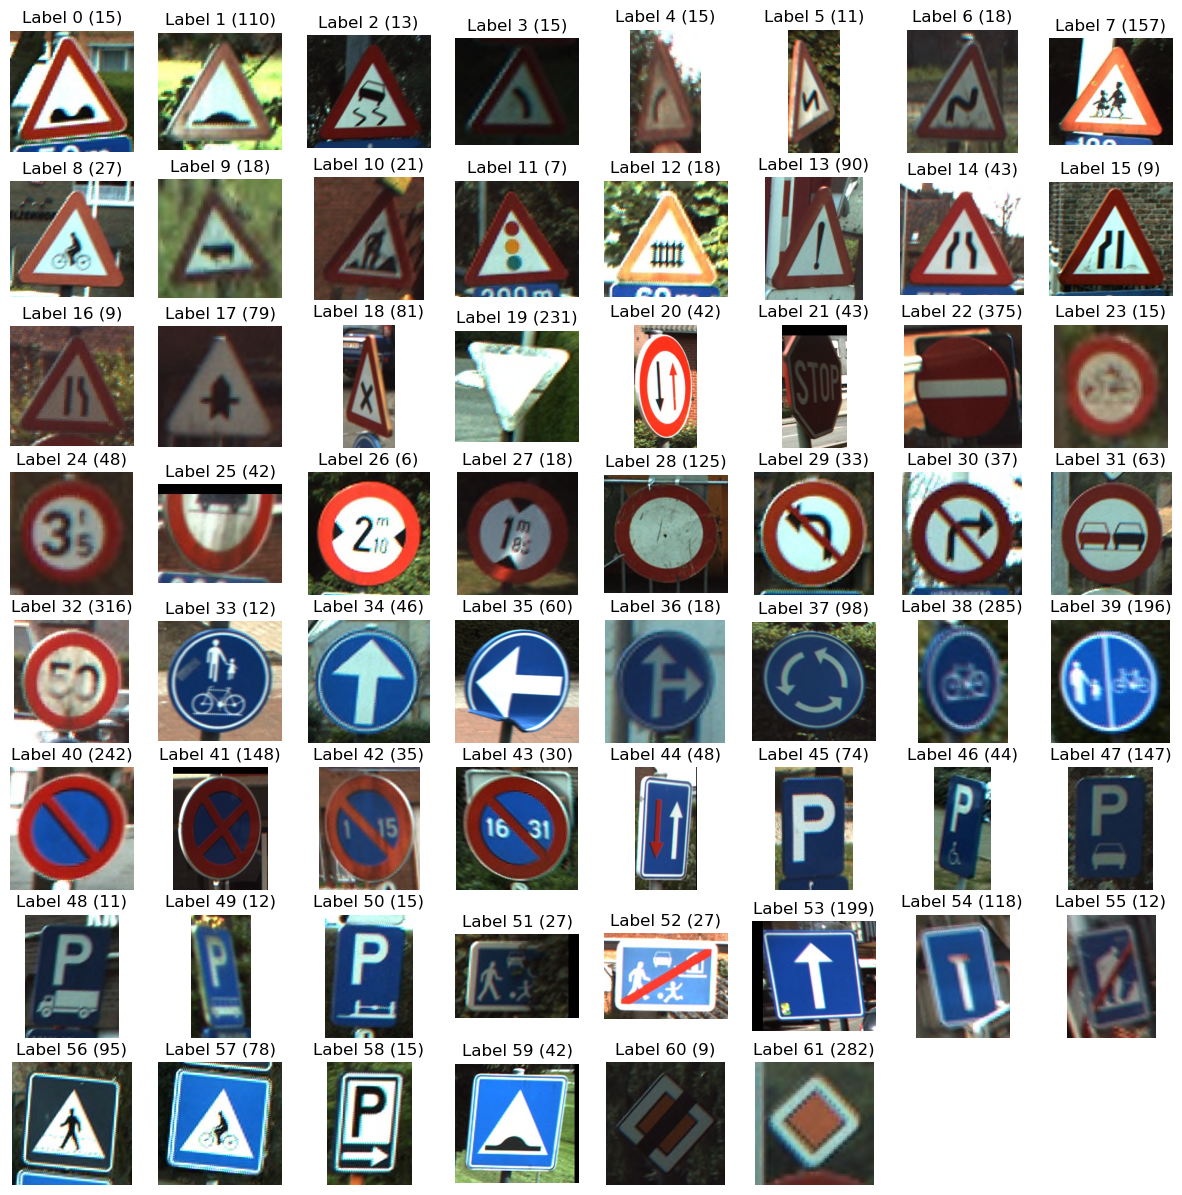

In [6]:
# Імпорт модуля &#39;pyplot&#39; &#39;matplotlib&#39;
import matplotlib.pyplot as plt
# Задаємо типи
unique_labels = set(labels)
# Ініціалізація графіка
plt.figure(figsize=(15, 15))
# Задаємо лічильник
i = 1
# Для кожного типу:
for label in unique_labels:
    # Вибираємо перше зображення кожного типу:
    image = images[labels.index(label)]
    # Задаємо 64 графіка
    plt.subplot(8, 8, i)
    # Вимикання осей
    plt.axis("off")
    # Додаємо заголовок кожному графіку
    plt.title("Label {0} ({1})".format(label, labels.count(label)))
    # Збільшуємо значення лічильника на 1
    i += 1
    # Виводимо перше зображення
    plt.imshow(image)
# Виводимо весь графік
plt.show()

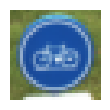

shape: (28, 28, 3), min: 0, max: 255


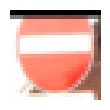

shape: (28, 28, 3), min: 0, max: 255


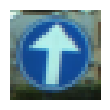

shape: (28, 28, 3), min: 0, max: 255


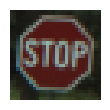

shape: (28, 28, 3), min: 0, max: 215


In [7]:
from skimage import transform

transformed_images = [transform.resize(images[i], (28, 28)) for i in traffic_signs]

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis("off")
    plt.imshow(transformed_images[i])
    plt.subplots_adjust(wspace=0.5)
    plt.show()
    print("shape: {0}, min: {1}, max: {2}".format(transformed_images[i].shape,
images[traffic_signs[i]].min(),
images[traffic_signs[i]].max()))

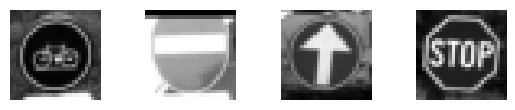

In [9]:
from skimage.color import rgb2gray
import numpy as np

gray_images = rgb2gray(np.array(transformed_images))

for i in range(len(traffic_signs)):
    plt.subplot(1, 4, i+1)
    plt.axis("off")
    plt.imshow(gray_images[i], cmap="gray")
    plt.subplots_adjust(wspace=0.5)
plt.show()

In [10]:
# prepare dataset 

transformed_images = [transform.resize(image, (28, 28)) for image in images]
gray_images = rgb2gray(np.array(transformed_images))
labels = np.array(labels)


In [23]:
# Імпорт `tensorflow`
import tensorflow as tf

# Define the model using Keras API
model = tf.keras.Sequential([
    # Flatten the input from (28, 28) to (28*28)
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    
    # Fully connected layer with ReLU activation
    tf.keras.layers.Dense(62, activation='relu'),
    # tf.keras.layers.Dense(10)  # Example output layer for classification
    # tf.keras.layers.Dense(10)  # Example output layer for classification
])

# Define the loss function (sparse softmax cross-entropy)
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

# Define the optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

# Training loop
epochs = 201

for epoch in range(epochs):
    if epoch % 10 == 0:
        print(f"EPOCH {epoch}")
    
    # Open a GradientTape for tracking
    with tf.GradientTape() as tape:
        # Forward pass
        logits = model(gray_images, training=True)
        
        # Compute loss
        loss_value = loss_fn(labels, logits)
    
        # Compute gradients and apply them
        grads = tape.gradient(loss_value, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        
        # Compute accuracy
        predictions = tf.argmax(logits, axis=1)
        accuracy = tf.reduce_mean(tf.cast(predictions == labels, tf.float32))
        
        # Print accuracy every 10 epochs
        if epoch % 10 == 0:
            print(f"Loss: {loss_value.numpy()}")
            print(f"Accuracy: {accuracy.numpy()}")

print("DONE WITH TRAINING")

EPOCH 0
Loss: 4.146636962890625
Accuracy: 0.012240436859428883
EPOCH 10
Loss: 3.560349941253662
Accuracy: 0.1180327832698822
EPOCH 20
Loss: 3.2826333045959473
Accuracy: 0.27213114500045776
EPOCH 30
Loss: 3.0359458923339844
Accuracy: 0.41333332657814026
EPOCH 40
Loss: 2.8380136489868164
Accuracy: 0.48459017276763916
EPOCH 50
Loss: 2.6768903732299805
Accuracy: 0.526994526386261
EPOCH 60
Loss: 2.546170711517334
Accuracy: 0.5567213296890259
EPOCH 70
Loss: 2.439870595932007
Accuracy: 0.5836065411567688
EPOCH 80
Loss: 2.3519887924194336
Accuracy: 0.6048087477684021
EPOCH 90
Loss: 2.277963638305664
Accuracy: 0.6249180436134338
EPOCH 100
Loss: 2.214660406112671
Accuracy: 0.6386885046958923
EPOCH 110
Loss: 2.1596693992614746
Accuracy: 0.6485245823860168
EPOCH 120
Loss: 2.111130714416504
Accuracy: 0.6587978005409241
EPOCH 130
Loss: 2.0676748752593994
Accuracy: 0.6664481163024902
EPOCH 140
Loss: 2.0285801887512207
Accuracy: 0.6734426021575928
EPOCH 150
Loss: 1.9931151866912842
Accuracy: 0.6806557

Actual labels: [18, 42, 38, 22, 56, 8, 45, 22, 53, 7]
Predicted labels: [18 41 39 22 56  8 45 22 53  7]


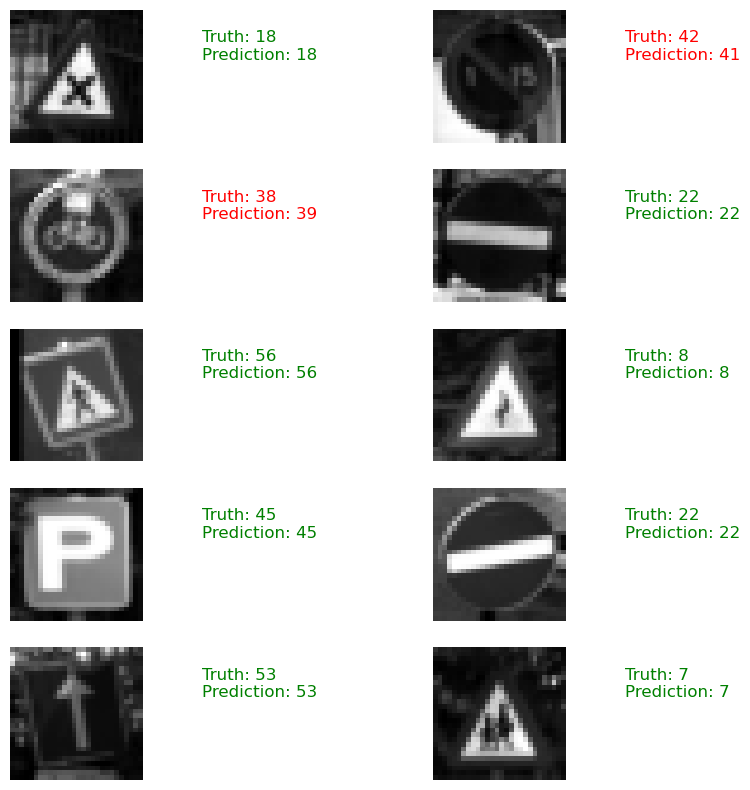

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tensorflow as tf

# Select 10 random images
sample_indexes = random.sample(range(len(gray_images)), 10)
sample_images = [gray_images[i] for i in sample_indexes]
sample_labels = [labels[i] for i in sample_indexes]

# Convert sample_images to a NumPy array
sample_images_np = np.array(sample_images)

# Make predictions using the model (assuming model is defined and trained)
predicted_logits = model(sample_images_np)  # Get the logits
predicted = tf.argmax(predicted_logits, axis=1).numpy()  # Convert logits to predicted labels

# Print actual and predicted labels
print("Actual labels:", sample_labels)
print("Predicted labels:", predicted)

# Display predicted and actual images
fig = plt.figure(figsize=(10, 10))
for i in range(len(sample_images)):
    truth = sample_labels[i]
    prediction = predicted[i]
    
    plt.subplot(5, 2, 1 + i)
    plt.axis('off')
    
    color = 'green' if truth == prediction else 'red'
    plt.text(40, 10, f"Truth: {truth}\nPrediction: {prediction}", fontsize=12, color=color)
    plt.imshow(sample_images[i], cmap="gray")

plt.show()

In [25]:
from skimage import transform
from skimage.color import rgb2gray
# Завантаження даних перевірки
test_images, test_labels = load_data(test_data_directory)
# Перетворення зображень в 28 х 28 пікселів
test_images28 = [transform.resize(image, (28, 28)) for image in test_images]
test_images28 = rgb2gray(np.array(test_images28))

# Make predictions using the model (assuming the model is defined and trained)
predicted_logits = model(test_images28)  # Get the logits
predicted = tf.argmax(predicted_logits, axis=1).numpy()  # Convert logits to predicted labels

# Calculate matches
match_count = sum([int(y == y_) for y, y_ in zip(test_labels, predicted)])

# Calculate accuracy
accuracy = match_count / len(test_labels)

# Print accuracy
print("Accuracy: {:.3f}".format(accuracy))

Accuracy: 0.645
